# **Cluster Analysis**

1.   Rainal Yusril B - 05211740000018
2.   Annisa Afisina - 05211740000087
3.   Zaneta Nilam C - 05211740000119



# **IMPORT LIBRARY DAN DATASET**

Pada tahap ini, kami melakukan impor library awal yang dibutuhkan untuk melakukan klasterisasi dan juga impor dataset yang akan digunakan.

In [ ]:
import pandas as pd #data processing
import seaborn as sns #membuat plot
import numpy as np #aljabar linear
import matplotlib.pyplot as plt #membuat plot
from scipy import stats #statistics functions

In [ ]:
df = pd.read_csv('/abalone_dataset.csv', header=None)
df

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
#memberikan header atau nama kolom pada setiap kolom
df.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']
df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# **EXPLORATORY DATA ANALYSIS**

Pada tahap ini, dilakukan eksplorasi data terkait dataset yang dimiliki. Baik univariate, maupun bivariate. Hal ini dilakukan untuk menganalisa informasi terkait dataset abalone.

In [ ]:
#Dapat dilihat nilai statistik dasar seperti mean, min, max dan lain-lain melalui .describe()
df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
# Dapat terlihat bahwa ada 1 kolom dengan tipe data object, 7 kolom dengan tipe data float, dan 1 kolom dengan tipe data integer. 
#Selain itu, juga terdapat sebanyak 4177 baris pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
# Memisahkan kolom dengan tipe data numerik dan objek ke dalam dua variabel yang berbeda
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns

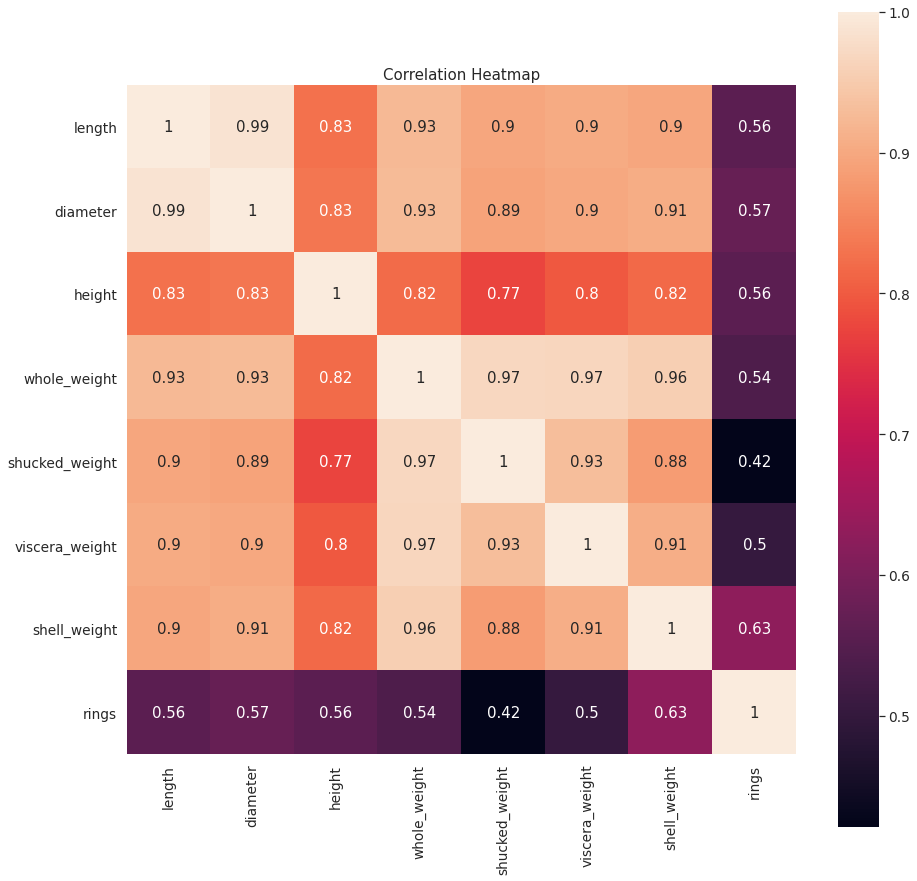

In [ ]:
# Membuat correlation heatmap untuk melihat nilai korelasi antar kolom
cm = np.corrcoef(df[nf].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(15,15))
ax = plt.axes()
heatmap = sns.heatmap(cm, cbar=True, annot=True, square=True, yticklabels=nf.values, xticklabels=nf.values)
ax.set_title('Correlation Heatmap')
plt.show()

Pada heatmap, dapat telihat bahwa kolom *rings* memiliki nilai korelasi paling rendah dengan setiap variabel. Nilai korelasi *whole_weight* termasuk tinggi dan rata pada semua variabel. Nilai korelasi tertinggi didapatkan oleh variabel *diameter* dan *length* dan nilai korelasi terendah didapatkan oleh *shucked_weight* dan *rings*. Nilai korelasi *rings* paling tinggi didapatkan dari hubungan dengan *shell_weight*.

Kemudian selanjutnya, akan dilihat pada tiap atribut menggunakan histogram. Pada histogram di bawah dapat terlihat bagaimana distribusi nilai untuk setiap atribut yang dimiliki. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8039f999e8>,
      dtype=object)

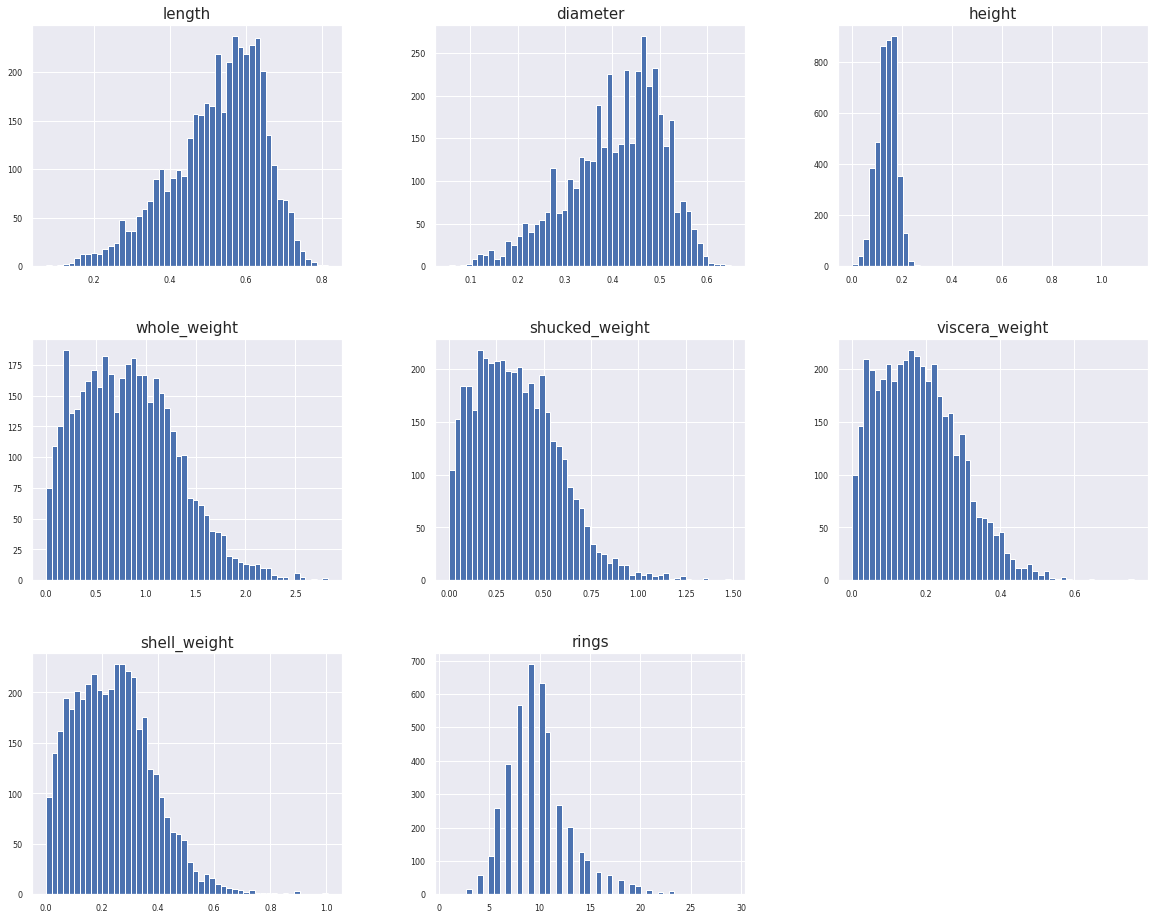

In [ ]:
df.hist(figsize=(20,16), bins=50, xlabelsize=8, ylabelsize=8)

Selain melakukan eksplorasi data seperti di atas, kami juga melakukan eksplorasi data lainnya seperti eksplorasi atau analisis keterhubungan antar variabel satu dengan variabel lainnya. Berikut ini adalah plot yang menunjukkan hubungan antara variabel Length dengan variabel Height. Diketahui bahwa Length dengan Height berkorelasi linear dengan Length. Akan tetapi dapat ditemukan adanya outlier pada plot ini.

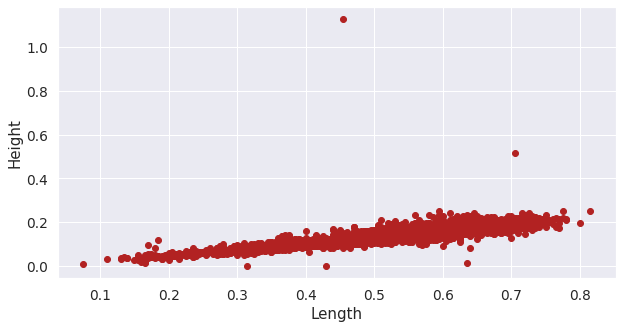

In [ ]:
#Lenght dan height
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(df["length"], df["height"], color='#B22222')
plt.xlabel('Length')
plt.ylabel('Height')
plt.show()

Selain itu kami juga melakukan explorasi keterhubungan antara Length dan Ring. Kemudian Height dengan Ring, dan yang terakhir antara Diameter dan Ring. 

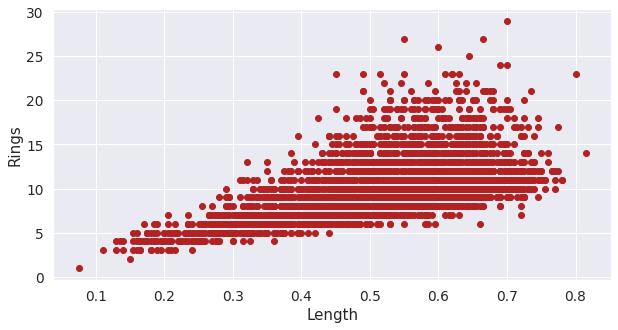

In [ ]:
#Lenght dan ring
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(df["length"], df["rings"], color='#B22222')
plt.xlabel('Length')
plt.ylabel('Rings')
plt.show()

Dalam eksplorasi diatas bisa ditemukan bahwa nilai ring cenderung mengikuti length. Jika nilai length tinggi, maka nilai ring cenderung tinggi juga.

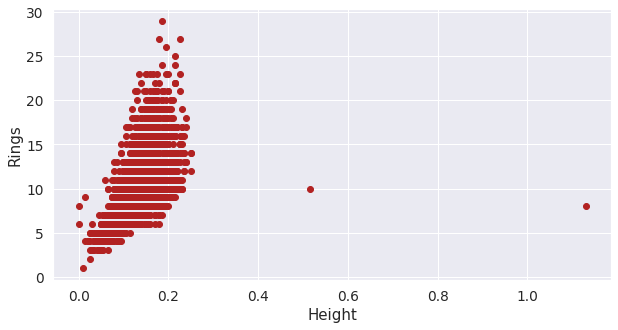

In [ ]:
#Height dan rings
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(df["height"], df["rings"], color='#B22222')
plt.xlabel('Height')
plt.ylabel('Rings')
plt.show()

Dalam eksplorasi antara Ring dan Height ditemukan bahwa hampir semua data memiliki nilai height dibawah 0,4. Data ini bisa menunjukkan bahwa semakin tinggi nilai height maka nilai ring cenderung untuk mengikuti atau semakin tinggi juga. Begitupun dengan hubungan antara diameter dan ring yang ditunjukkan pada plot di bawah ini.

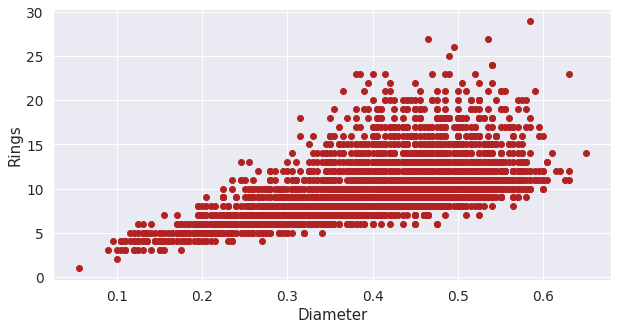

In [ ]:
#Diameter dan rings
fig, ax = plt.subplots(figsize=(10, 5))
plt.scatter(df["diameter"], df["rings"], color='#B22222')
plt.xlabel('Diameter')
plt.ylabel('Rings')
plt.show()

Selanjutnya kami juga melakukan eksplorasi hubungan antara variabel sex dan variabel Rings. Abalone dengan jenis sex M dan F paling banyak memiliki ring antara 9-13, sedangkan untuk abalone yang berjenis I paling banyak memiliki ring antara 6 - 9.

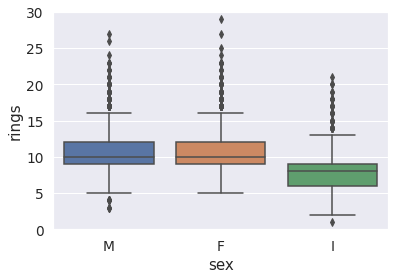

In [ ]:
f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxplot(x='sex', y="rings", data=df)
fig.axis(ymin=0, ymax=30);

# **PRAPROSES DATA**

Pada tahap ini, dilakukan praproses data dengan menghapus *missing values* dan menghilangkan *outliers*.

In [ ]:
# Mengecek jika terdapat missing values
# Didapati bahwa tidak ada missing values pada dataframe, sehingga praproses dapat dilanjutkan ke step selanjutnya
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [ ]:
# Memisahkan data objek (kolom sex) menjadi kolom-kolom numerik sehingga dapat dilakukan klasterisasi nantinya
df = pd.get_dummies(df)
df

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


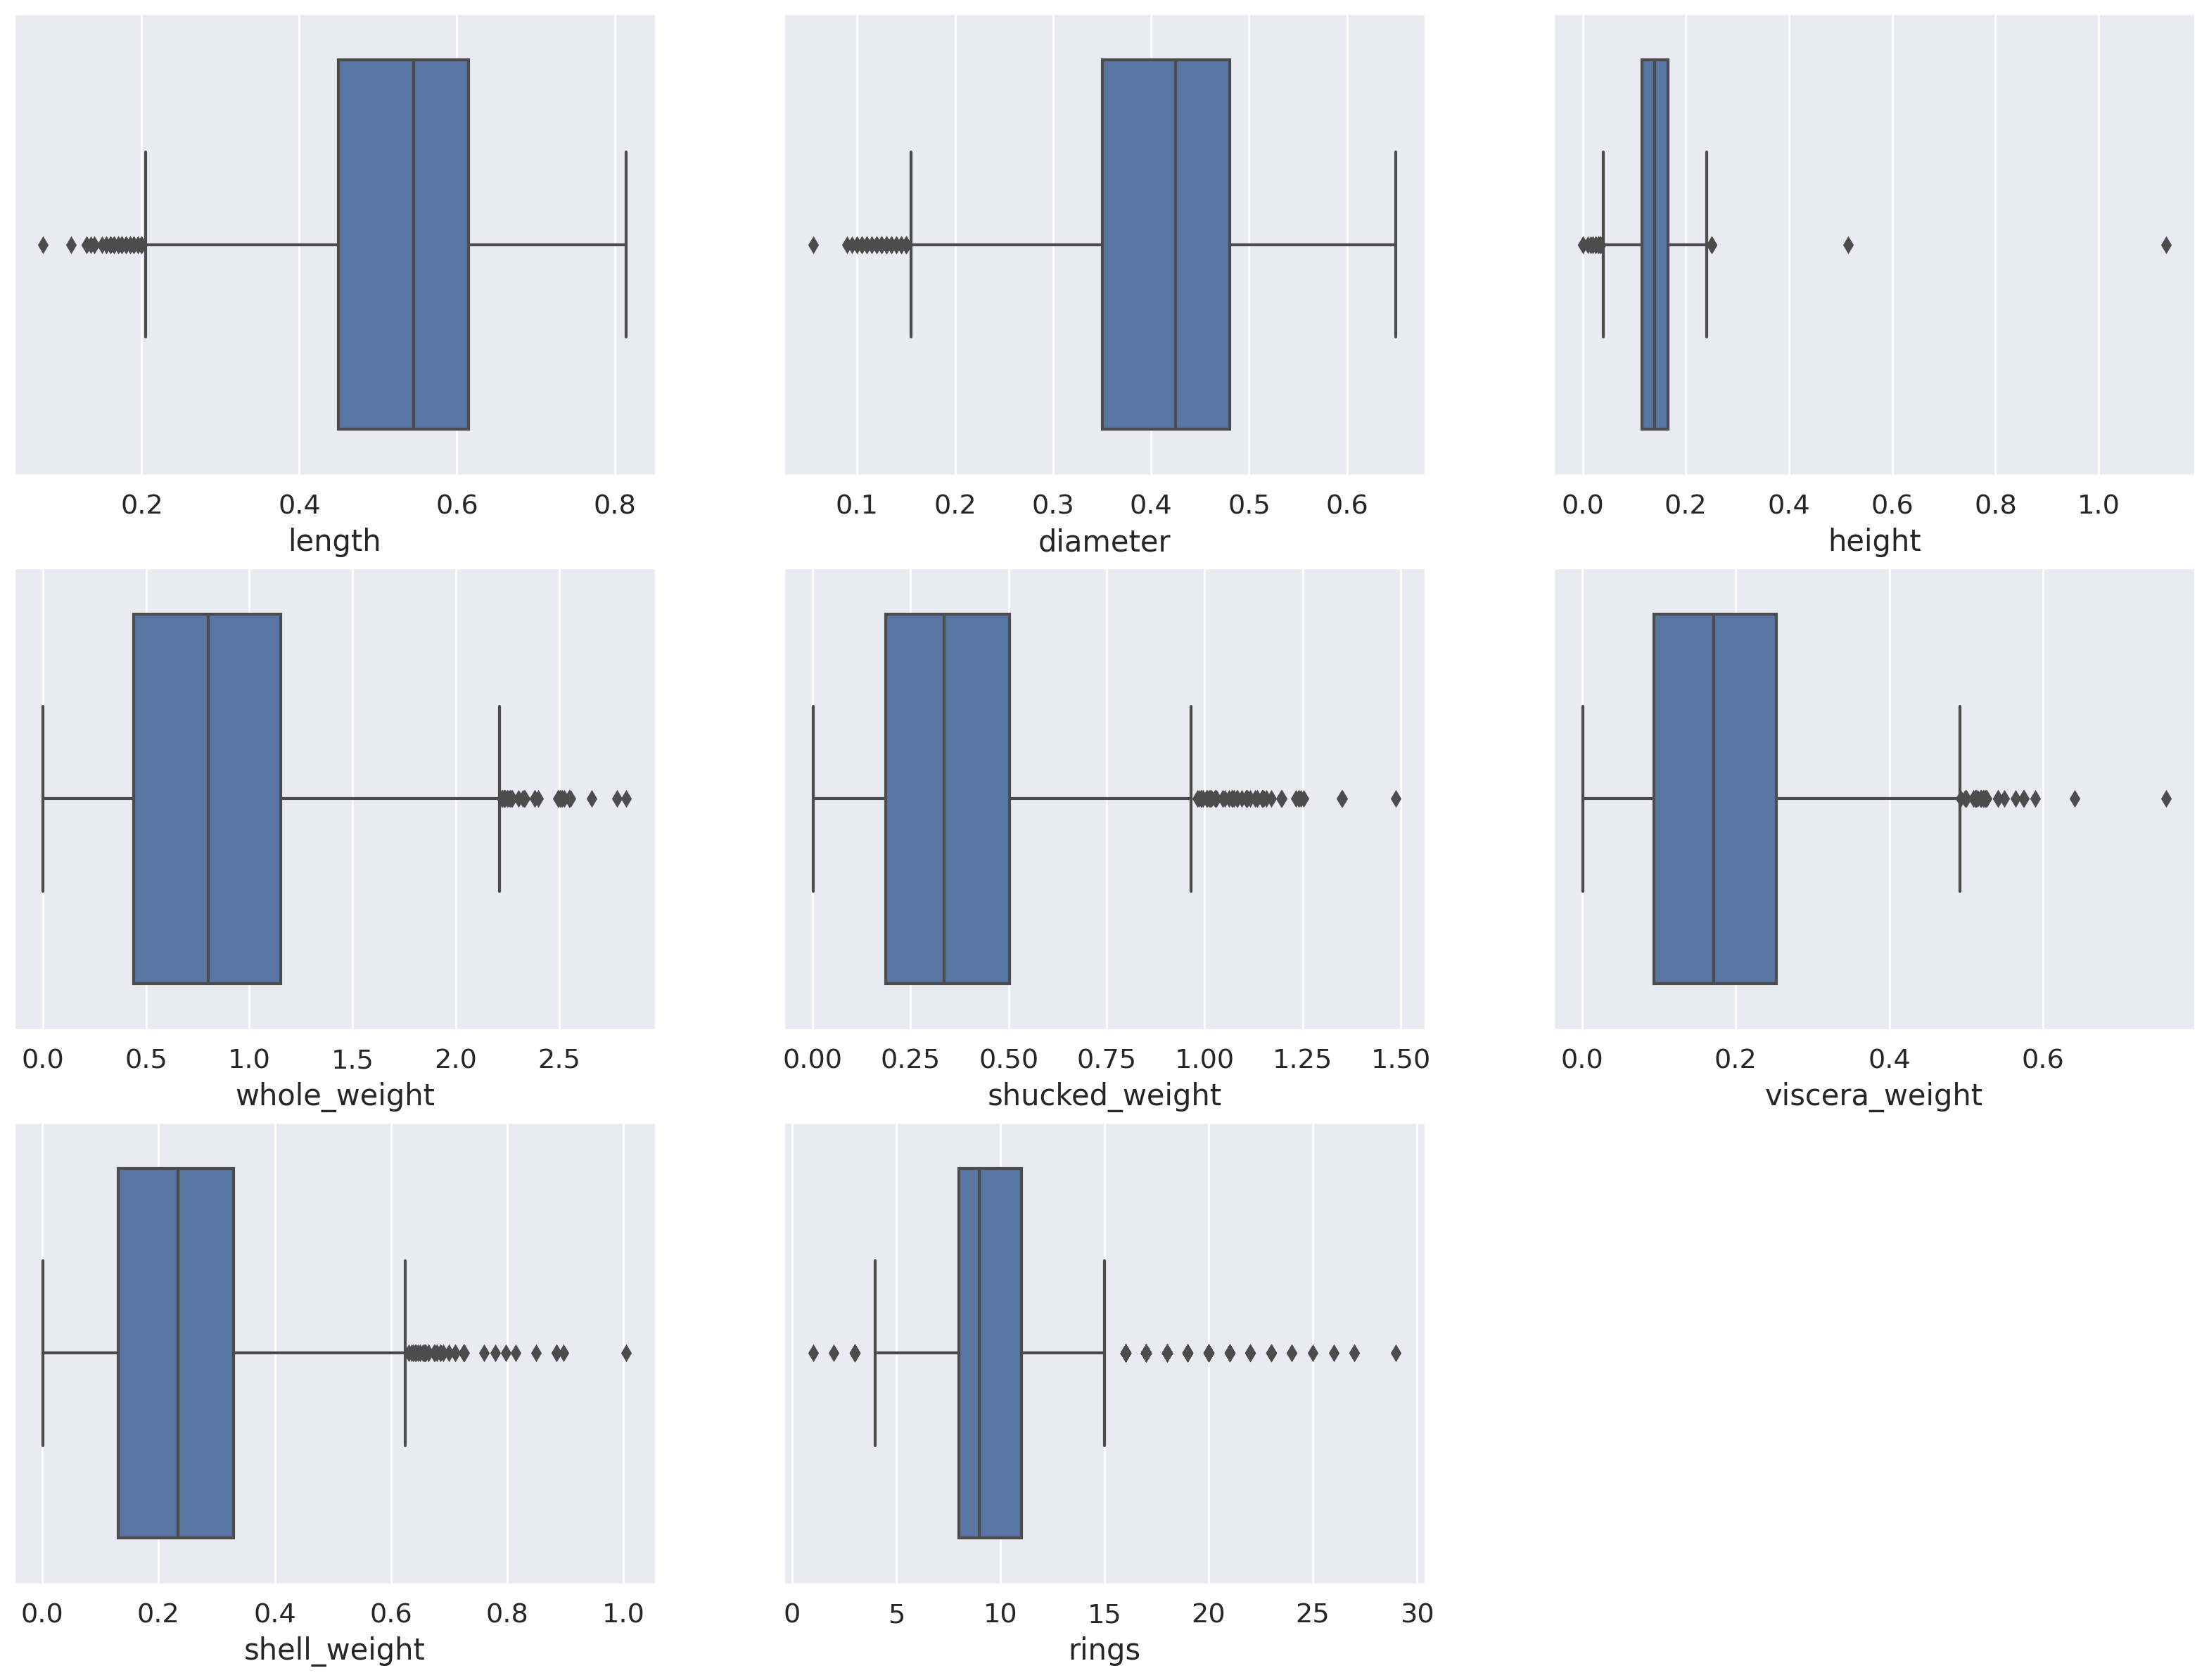

In [ ]:
# Melihat persebaran data dengan boxplot dan melihat jika dibutuhkan penghapusan outliers pada dataset
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'length', data = df)

plt.subplot(4,3,2)
sns.boxplot(x = 'diameter', data = df)

plt.subplot(4,3,3)
sns.boxplot(x = 'height', data = df)

plt.subplot(4,3,4)
sns.boxplot(x = 'whole_weight', data = df)

plt.subplot(4,3,5)
sns.boxplot(x = 'shucked_weight', data = df)

plt.subplot(4,3,6)
sns.boxplot(x = 'viscera_weight', data = df)

plt.subplot(4,3,7)
sns.boxplot(x = 'shell_weight', data = df)

plt.subplot(4,3,8)
sns.boxplot(x = 'rings', data = df)

In [ ]:
# Mengecek jika terdapat outliers pada data-data numerik yang ada pada dataset

z = np.abs(stats.zscore(df[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3 
print('Di bawah ini adalah titik pencilan dan nomor kolom masing-masing pencilan')
print("\n")
print(np.where(z > 3))

[[0.57455813 0.43214879 1.06442415 ... 0.72621157 0.63821689 1.57154357]
 [1.44898585 1.439929   1.18397831 ... 1.20522124 1.21298732 0.91001299]
 [0.05003309 0.12213032 0.10799087 ... 0.35668983 0.20713907 0.28962385]
 ...
 [0.6329849  0.67640943 1.56576738 ... 0.97541324 0.49695471 0.28962385]
 [0.84118198 0.77718745 0.25067161 ... 0.73362741 0.41073914 0.02057072]
 [1.54905203 1.48263359 1.32665906 ... 1.78744868 1.84048058 0.64095986]]


*******************************************************************************


Di bawah ini adalah titik pencilan dan nomor kolom masing-masing pencilan


(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
        238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
        334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
        674,  675,  678,  694,

In [ ]:
# Menghapus pencilan dengan threshold 3.
# Didapati terdapat sebanyak 4027 baris data setelah dilakukan penghapusan pencilan
df = df[(z<3).all(axis=1)]
df

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


## **ANALISIS KLASTER**

# **K-Means**

Pada tahap ini, dilakukan klasterisasi menggunakan algoritma K-Means.

In [ ]:
# Melakukan impor library yang akan digunakan untuk klasterisasi K-Means

from sklearn.cluster import KMeans # melakukan klasterisasi K-Means
from sklearn.preprocessing import StandardScaler, normalize # normalisasi
from sklearn.decomposition import PCA # melakukan transformasi PCA
from kneed import KneeLocator # memakai kneelocator untuk mengetahui knee/mengevaluasi jumlah klaster optimal

In [ ]:
x = df.drop(['rings'], axis = 1)
y = df['rings']

In [ ]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,0.288780,0.501223
1,0.758586,0.428567


In [ ]:
# Mengambil nilai SSE dari masing-masing jumlah cluster
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

In [ ]:
# Menampilkan nilai sse masing masing-masing jumlah klaster
sse

[3894.0641199667252,
 2181.757435544952,
 833.3955850157113,
 595.4948316883844,
 411.8494890151061,
 305.4503991152478,
 237.63397639820104,
 188.22772910759605,
 160.49018334451142,
 133.04485524512936]

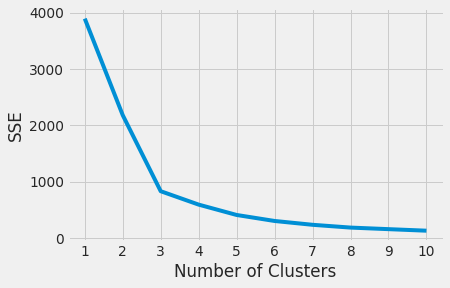

In [ ]:
# Visualisasi SSE ke dalam grafik
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

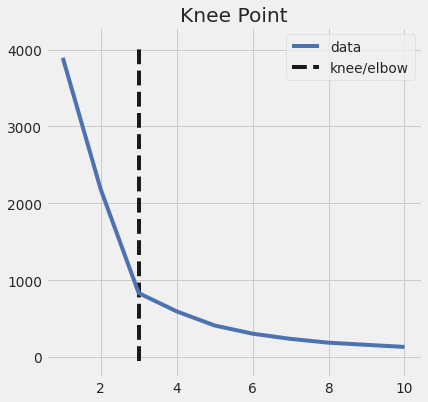

In [ ]:
# Mencari elbow/knee (jumlah cluster paling optimal)
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
kl.plot_knee()
# Didapatkan bahwa knee atau jumlah klaster paling optimal adalah 3

In [ ]:
# pengaturan kmeans dengan jumlah klaster paling optimal
kmean = KMeans(n_clusters=3, random_state=42)

# fitting model
kmean.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
# mengambil koordinat centroid
centers = kmean.cluster_centers_
print(centers)

[[ 4.30571537e-01  3.28686601e-01  1.08826646e-01  4.33875852e-01
   1.92400833e-01  9.25832702e-02  1.28724451e-01 -3.94129174e-15
   1.00000000e+00 -1.20459198e-14]
 [ 5.75508000e-01  4.51720000e-01  1.55700000e-01  1.01914520e+00
   4.36542800e-01  2.25919600e-01  2.92104000e-01  9.99200000e-01
   8.00000000e-04 -1.12132525e-14]
 [ 5.56212225e-01  4.34958791e-01  1.49278846e-01  9.51794299e-01
   4.16195742e-01  2.08046703e-01  2.70438187e-01 -3.99680289e-15
  -1.03250741e-14  1.00000000e+00]]


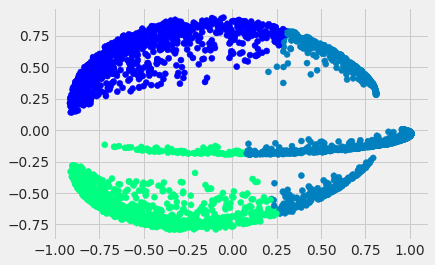

In [ ]:
# melakukan visualisasi klaster K-Means yang telah dibuat
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

## **Kesimpulan**

Jumlah pengelompokan data pada algoritma k-means adalah 3 cluster,
dari 4177 data. Dari 3 cluster yang didapatkan : Cluster 1 memiliki usia yang singkat, cluster 2 memiliki usia yang sedang, dan cluster 3 meiliki usia yang lama.

# **Vector Quantization**

Pada tahap ini, dilakukan klasterisasi menggunakan algoritma Vector Quantization.

In [ ]:
# Dilakukan pemilihan kolom atau variabel yang akan digunakan untuk klasterisasi.
# Pada klasterisasi ini, digunakan variabel diameter dan shell_weight karena memiliki nilai korelasi paling tinggi terhadap rings.
# Hal ini dilakukan karena jika menggunakan semua variabel selain rings untuk klasterisasi, didapatkan nilai tetap sebesar 0.6504484192255888 untuk semua threshold yang berbeda

x1 = df[['diameter', 'shell_weight']]

In [ ]:
# Import Library
from sklearn.metrics import  silhouette_score # mengambil nilai evaluasi silhouette
from scipy.cluster.vq import vq, kmeans # melakukan klasterisasi vq dengan kmeans
from pylab import plot,show # membuat plot

In [ ]:
# Mengambil centroid menggunakan K-Means dari setiap threshold yang berbeda-beda
centroids1,_ = kmeans(x1, 3, thresh=1e-5)
centroids2,_ = kmeans(x1, 3, thresh=1e-6)
centroids3,_ = kmeans(x1, 3, thresh=1e-7)
centroids4,_ = kmeans(x1, 3, thresh=1e-8)
centroids5,_ = kmeans(x1, 3, thresh=1e-9)
centroids6,_ = kmeans(x1, 3, thresh=1e-10)

# Mendapatkan hasil cluster menggunakan vq dengan centroid yang didapat dari K-Means
idx1,_ = vq(x1, centroids1)
idx2,_ = vq(x1, centroids2)
idx3,_ = vq(x1, centroids3)
idx4,_ = vq(x1, centroids4)
idx5,_ = vq(x1, centroids5)
idx6,_ = vq(x1, centroids6)

# Mendapatkan nilai evaluasi silhouette untuk setiap klasterisasi yang telah dilakukan
silhouette_avg1 = silhouette_score(x1, idx1)
silhouette_avg2 = silhouette_score(x1, idx2)
silhouette_avg3 = silhouette_score(x1, idx3)
silhouette_avg4 = silhouette_score(x1, idx4)
silhouette_avg5 = silhouette_score(x1, idx5)
silhouette_avg6 = silhouette_score(x1, idx6)
print("untuk thresh 1e-5, nilai silhouette-nya adalah {0}".format(silhouette_avg1))
print("untuk thresh 1e-6, nilai silhouette-nya adalah {0}".format(silhouette_avg2))
print("untuk thresh 1e-7, nilai silhouette-nya adalah {0}".format(silhouette_avg3))
print("untuk thresh 1e-8, nilai silhouette-nya adalah {0}".format(silhouette_avg4))
print("untuk thresh 1e-9, nilai silhouette-nya adalah {0}".format(silhouette_avg5))
print("untuk thresh 1e-10, nilai silhouette-nya adalah {0}".format(silhouette_avg6))

untuk thresh 1e-5, nilai silhouette-nya adalah 0.49735609393346003
untuk thresh 1e-6, nilai silhouette-nya adalah 0.4973661717647791
untuk thresh 1e-7, nilai silhouette-nya adalah 0.4989191443298611
untuk thresh 1e-8, nilai silhouette-nya adalah 0.4982231913299276
untuk thresh 1e-9, nilai silhouette-nya adalah 0.49745359749493395
untuk thresh 1e-10, nilai silhouette-nya adalah 0.49828734462805085


Text(0.5, 1.0, 'Predicted')

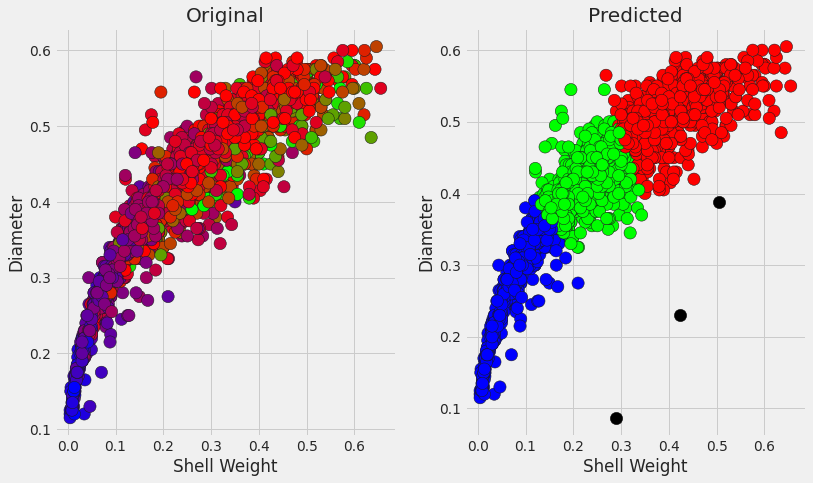

In [ ]:
# Melakukan visualisasi untuk membandingkan dengan kelas original

fig, axes = plt.subplots(1, 2, figsize=(12,7))
axes[0].axes.scatter(x1['shell_weight'], x1['diameter'], c=y, cmap='brg', edgecolor='k', s=150)
axes[1].scatter(x1['shell_weight'], x1['diameter'], c=idx5, cmap='brg', edgecolor='k', s=150)
axes[1].scatter(centroids5[:, 0], centroids5[:, 1], c='black', s=150)
axes[0].set_xlabel('Shell Weight')
axes[0].set_ylabel('Diameter')
axes[1].set_xlabel('Shell Weight')
axes[1].set_ylabel('Diameter')
axes[0].set_title('Original')
axes[1].set_title('Predicted')

##**Kesimpulan**

Dari klasterisasi vq yang telah dilakukan, didapatkan bahwa threshold terbaik adalah 1e-9 dengan nilai silhouette 0.49866862319152305. Walaupun begitu, nilai evaluasi silhouette yang didapatkan tidak jauh berbeda antara satu dan yang lainnya.

# **Agglomerative Hierarchical Clustering**

Pada tahap ini, dilakukan klasterisasi menggunakan algoritma Agglomerative Hierarchical Clustering.

In [ ]:
# import library
from sklearn.cluster import AgglomerativeClustering

# membuat model
cluster = AgglomerativeClustering(n_clusters=3, linkage="complete")
cluster.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

Text(0.5, 1.0, 'Predicted')

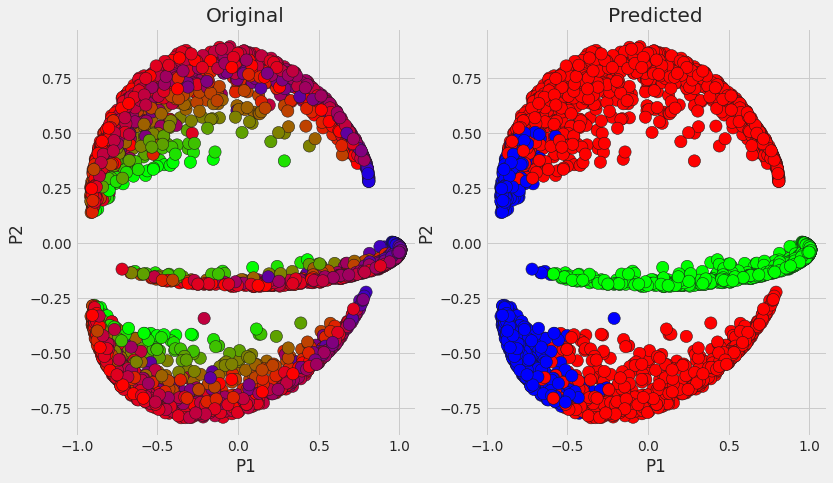

In [ ]:
new_labels = cluster.labels_
# visualisasi perbandingan kelas origin dengan hasil klaster
fig, axes = plt.subplots(1, 2, figsize=(12,7))
axes[0].scatter(X_principal["P1"], X_principal["P2"], c=y, cmap='brg', edgecolor='k', s=150)
axes[1].scatter(X_principal["P1"], X_principal["P2"], c=new_labels, cmap='brg', edgecolor='k', s=150)
axes[0].set_xlabel('P1')
axes[0].set_ylabel('P2')
axes[1].set_xlabel('P1')
axes[1].set_ylabel('P2')
axes[0].set_title('Original')
axes[1].set_title('Predicted')

Text(0.5, 1.0, 'Predicted (Single)')

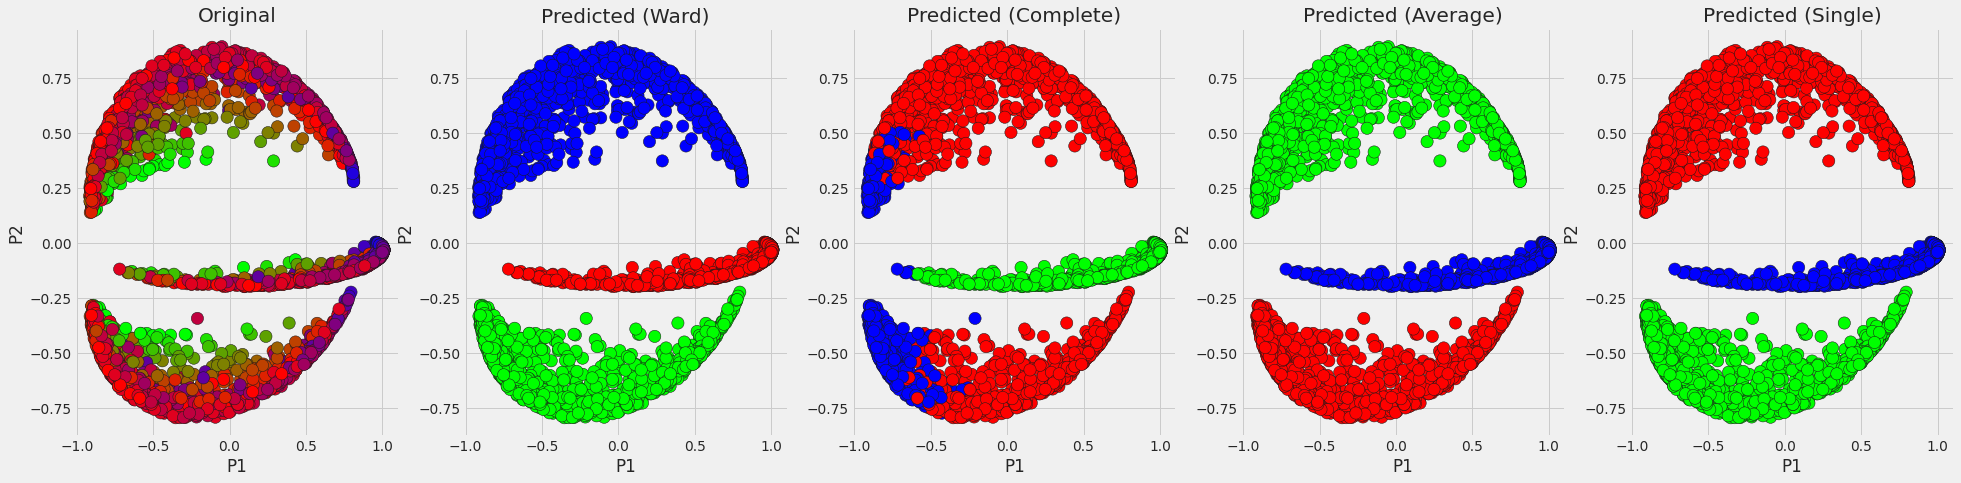

In [ ]:
# agglomerative Ward
ward = AgglomerativeClustering(n_clusters=3, linkage="ward")
ward.fit(x)

# agglomerative complete (MAX)
max = AgglomerativeClustering(n_clusters=3, linkage="complete")
max.fit(x)

# agglomerative average
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
avg.fit(x)

# agglomerative single (MIN)
min = AgglomerativeClustering(n_clusters=3, linkage="single")
min.fit(x)

ward_label = ward.labels_
max_label = max.labels_
avg_label = avg.labels_
min_label = min.labels_
# visualisasi perbandingan kelas origin dengan hasil klaster
fig, axes = plt.subplots(1, 5, figsize=(30,7))
axes[0].scatter(X_principal["P1"], X_principal["P2"], c=y, cmap='brg', edgecolor='k', s=150)
axes[1].scatter(X_principal["P1"], X_principal["P2"], c=ward_label, cmap='brg', edgecolor='k', s=150)
axes[2].scatter(X_principal["P1"], X_principal["P2"], c=max_label, cmap='brg', edgecolor='k', s=150)
axes[3].scatter(X_principal["P1"], X_principal["P2"], c=avg_label, cmap='brg', edgecolor='k', s=150)
axes[4].scatter(X_principal["P1"], X_principal["P2"], c=min_label, cmap='brg', edgecolor='k', s=150)
axes[0].set_xlabel('P1')
axes[0].set_ylabel('P2')
axes[1].set_xlabel('P1')
axes[1].set_ylabel('P2')
axes[2].set_xlabel('P1')
axes[2].set_ylabel('P2')
axes[3].set_xlabel('P1')
axes[3].set_ylabel('P2')
axes[4].set_xlabel('P1')
axes[4].set_ylabel('P2')
axes[0].set_title('Original')
axes[1].set_title('Predicted (Ward)')
axes[2].set_title('Predicted (Complete)')
axes[3].set_title('Predicted (Average)')
axes[4].set_title('Predicted (Single)')

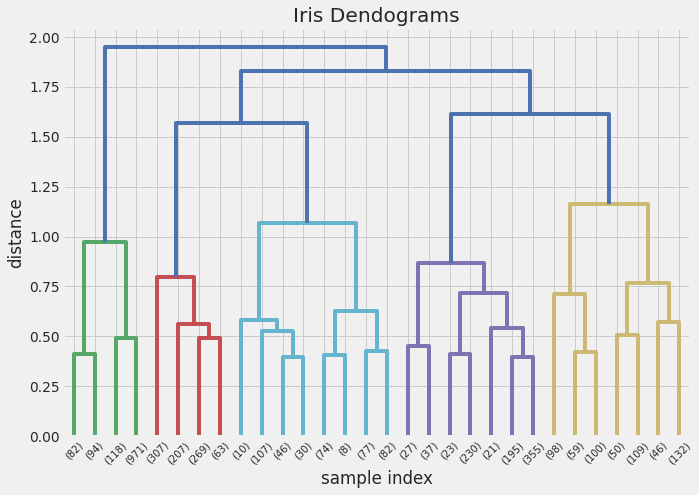

In [ ]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 7))
plt.title("Iris Dendograms")
plt.xlabel('sample index')
plt.ylabel('distance')
dend2 = sch.dendrogram(sch.linkage(X_principal, method='complete'), truncate_mode='lastp')

## **Kesimpulan**

Dalam percobaan Agglomerative Clustering dihasilkan tampilan dari 5 cluster yang cukup jelas. Perbedaan dan persebaran warna dapat dilihat bentuk dan persebaran dari clustering. Pada visualisasi Agglomerative Clusteing dari 5 cluster memiliki kejelasan dalam pemisahan obyek pada data tersebut.

# **Divisive Hierarchical Clustering (Minimum Spanning Tree)**

Pada tahap ini, dilakukan klasterisasi menggunakan algoritma Divisive Hierarchical Clustering (Minimum Spanning Tree).

In [ ]:
!pip install mst_clustering

In [ ]:
# Import library
from mst_clustering import MSTClustering

In [ ]:
# menggunakan MST
model = MSTClustering(cutoff=5, min_cluster_size=7)
model

MSTClustering(approximate=True, cutoff=5, cutoff_scale=None, metric='euclidean',
              metric_params=None, min_cluster_size=7, n_neighbors=20)

In [ ]:
labels = model.fit_predict(x)

Text(0.5, 1.0, 'Predicted')

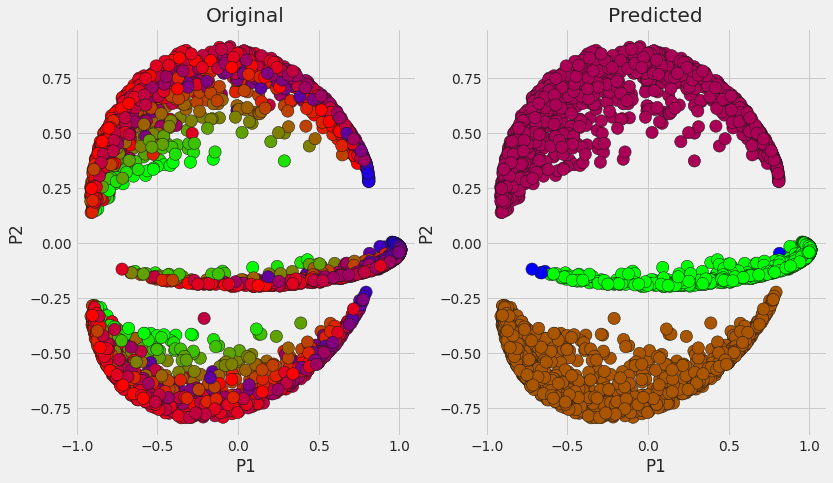

In [ ]:
# visualisasi perbandingan kelas origin dengan hasil klaster
fig, axes = plt.subplots(1, 2, figsize=(12,7))
axes[0].scatter(X_principal["P1"], X_principal["P2"], c=y, cmap='brg', edgecolor='k', s=150)
axes[1].scatter(X_principal["P1"], X_principal["P2"], c=labels, cmap='brg', edgecolor='k', s=150)
axes[0].set_xlabel('P1')
axes[0].set_ylabel('P2')
axes[1].set_xlabel('P1')
axes[1].set_ylabel('P2')
axes[0].set_title('Original')
axes[1].set_title('Predicted')

## **Kesimpulan**

Percobaan pada Divisive Clustering menghasilkan cluster yang cukup jelas perbedaan clusternya walaupun terdapat beberapa yang tumpang tindih. Penyebaran data terlihat dari perbedaan warna yang cukup jelas walaupun ada sedikit yang tumpang tindih. 

# **DBScan**

Pada tahap ini, dilakukan klasterisasi menggunakan algoritma DBScan.

In [ ]:
# import library
from sklearn.cluster import DBSCAN

In [ ]:
# Membuat model DBScan dengan berbagai epsilon untuk diambil epsilon terbaik nantinya
dbscan1 = DBSCAN(eps= 0.1, min_samples=5)
dbscan2 = DBSCAN(eps= 0.25, min_samples=5)
dbscan3 = DBSCAN(eps= 0.5, min_samples=5)
dbscan4 = DBSCAN(eps= 0.75, min_samples=5)
dbscan5 = DBSCAN(eps= 1, min_samples=5)

# Mengaplikasikan model
dbscan1.fit(x)
dbscan2.fit(x)
dbscan3.fit(x)
dbscan4.fit(x)
dbscan5.fit(x)
new_labels1 = dbscan1.labels_
new_labels2 = dbscan2.labels_
new_labels3 = dbscan3.labels_
new_labels4 = dbscan4.labels_
new_labels5 = dbscan5.labels_

# Membuat dua matriks, pertama nilai asli, kedua hasil prediksi
origin = df[["diameter", "shell_weight", "rings"]]
predicted = df[["diameter", "shell_weight"]]
predicted['rings1'] = new_labels1
predicted['rings2'] = new_labels2
predicted['rings3'] = new_labels3
predicted['rings4'] = new_labels4
predicted['rings5'] = new_labels5

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
# Menampilkan hasil prediksi dbscan
pd.set_option('display.max_rows', 10)
predicted

,diameter,shell_weight,rings1,rings2,rings3,rings4,rings5
0,0.365,0.1500,0,0,0,0,0
1,0.265,0.0700,0,0,0,0,0
2,0.420,0.2100,1,1,1,1,1
3,0.365,0.1550,0,0,0,0,0
4,0.255,0.0550,2,2,2,2,2
...,...,...,...,...,...,...,...
4172,0.450,0.2490,1,1,1,1,1
4173,0.440,0.2605,0,0,0,0,0
4174,0.475,0.3080,0,0,0,0,0
4175,0.485,0.2960,1,1,1,1,1


In [ ]:
# Impor library untuk melakukan evaluasi davies-bouldin
from sklearn.metrics import davies_bouldin_score

# Melakukan evaluasi hasil klasterisasi menggunakan indeks davies-bouldin
dbs1 = davies_bouldin_score(x, new_labels1)
dbs2 = davies_bouldin_score(x, new_labels2)
dbs3 = davies_bouldin_score(x, new_labels3)
dbs4 = davies_bouldin_score(x, new_labels4)
dbs5 = davies_bouldin_score(x, new_labels5)

# Menampilkan hasil evaluasi indeks davies-bouldin
print("untuk epsilon 0.1, nilai indeks davies bouldin-nya adalah {0}".format(dbs1))
print("untuk epsilon 0.25, nilai indeks davies bouldin-nya adalah {0}".format(dbs2))
print("untuk epsilon 0.5, nilai indeks davies bouldin-nya adalah {0}".format(dbs3))
print("untuk epsilon 0.75, nilai indeks davies bouldin-nya adalah {0}".format(dbs4))
print("untuk epsilon 1, nilai indeks davies bouldin-nya adalah {0}".format(dbs5))

untuk epsilon 0.1, nilai indeks davies bouldin-nya adalah 1.2629158686456785
untuk epsilon 0.25, nilai indeks davies bouldin-nya adalah 0.4928098258772677
untuk epsilon 0.5, nilai indeks davies bouldin-nya adalah 0.5391453132630502
untuk epsilon 0.75, nilai indeks davies bouldin-nya adalah 0.5391453132630502
untuk epsilon 1, nilai indeks davies bouldin-nya adalah 0.5391453132630502


Dari hasil evaluasi IDB, didapatkan bahwa jumlah epsilon terbaik adalah 0.25 karena memiliki nilai IDB terendah, yaitu sebesar 0.49.

In [ ]:
# Melakukan DBScan kedua untuk menentukan sample minimal untuk epsilon terbaik yang telah didapatkan sebelumnya
dbscan6 = DBSCAN(eps= 0.25, min_samples=2.5)
dbscan7 = DBSCAN(eps= 0.25, min_samples=5)
dbscan8 = DBSCAN(eps= 0.25, min_samples=7.5)
dbscan9 = DBSCAN(eps= 0.25, min_samples=10)
dbscan10 = DBSCAN(eps= 0.25, min_samples=12.5)

# Mengaplikasikan model
dbscan6.fit(x)
dbscan7.fit(x)
dbscan8.fit(x)
dbscan9.fit(x)
dbscan10.fit(x)
new_labels6 = dbscan6.labels_
new_labels7 = dbscan7.labels_
new_labels8 = dbscan8.labels_
new_labels9 = dbscan9.labels_
new_labels10 = dbscan10.labels_

# Membuat dua matriks, pertama nilai asli, kedua hasil prediksi
predicted['rings6'] = new_labels6
predicted['rings7'] = new_labels7
predicted['rings8'] = new_labels8
predicted['rings9'] = new_labels9
predicted['rings10'] = new_labels10

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
# menampilkan hasil prediksi dbscan kedua
pd.set_option('display.max_rows', 10)
predicted

,diameter,shell_weight,rings1,rings2,rings3,rings4,rings5,rings6,rings7,rings8,rings9,rings10
0,0.365,0.1500,0,0,0,0,0,0,0,0,0,0
1,0.265,0.0700,0,0,0,0,0,0,0,0,0,0
2,0.420,0.2100,1,1,1,1,1,1,1,1,1,1
3,0.365,0.1550,0,0,0,0,0,0,0,0,0,0
4,0.255,0.0550,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0.450,0.2490,1,1,1,1,1,1,1,1,1,1
4173,0.440,0.2605,0,0,0,0,0,0,0,0,0,0
4174,0.475,0.3080,0,0,0,0,0,0,0,0,0,0
4175,0.485,0.2960,1,1,1,1,1,1,1,1,1,1


In [ ]:
# Melakukan evaluasi hasil klasterisasi kedua menggunakan indeks davies-bouldin
dbs6 = davies_bouldin_score(x, new_labels6)
dbs7 = davies_bouldin_score(x, new_labels7)
dbs8 = davies_bouldin_score(x, new_labels8)
dbs9 = davies_bouldin_score(x, new_labels9)
dbs10 = davies_bouldin_score(x, new_labels10)

# Menampilkan hasil evaluasi indeks davies-bouldin
print("untuk minimal samples sebanyak 2.5, nilai indeks davies bouldin-nya adalah {0}".format(dbs6))
print("untuk minimal samples sebanyak 5, nilai indeks davies bouldin-nya adalah {0}".format(dbs7))
print("untuk minimal samples sebanyak 7.5, nilai indeks davies bouldin-nya adalah {0}".format(dbs8))
print("untuk minimal samples sebanyak 10, nilai indeks davies bouldin-nya adalah {0}".format(dbs9))
print("untuk minimal samples sebanyak 12.5, nilai indeks davies bouldin-nya adalah {0}".format(dbs10))

untuk minimal samples sebanyak 2.5, nilai indeks davies bouldin-nya adalah 0.4595364795633674
untuk minimal samples sebanyak 5, nilai indeks davies bouldin-nya adalah 0.4928098258772677
untuk minimal samples sebanyak 7.5, nilai indeks davies bouldin-nya adalah 0.4934958504090953
untuk minimal samples sebanyak 10, nilai indeks davies bouldin-nya adalah 0.4934958504090953
untuk minimal samples sebanyak 12.5, nilai indeks davies bouldin-nya adalah 0.4934958504090953


Text(0.5, 1.0, 'Predicted')

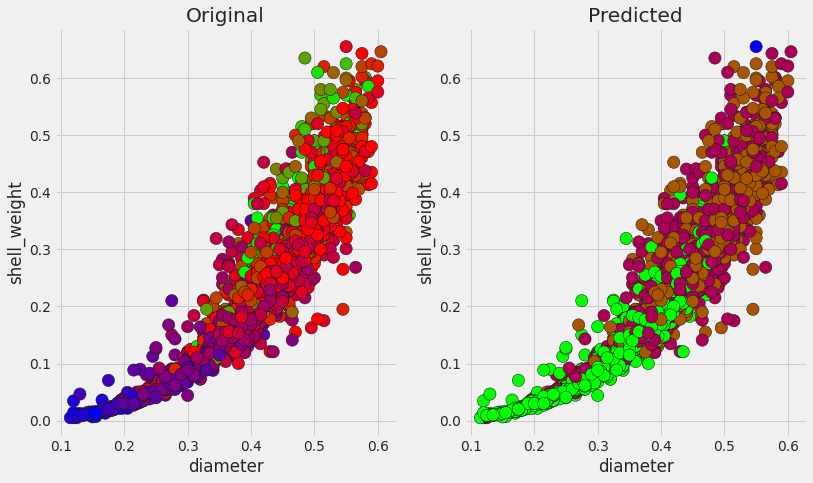

In [ ]:
# Melakukan visualisasi klasterisasi yang didapatkan dan perbandingan dengan kelas original
fig, axes = plt.subplots(1, 2, figsize=(12,7))
axes[0].scatter(x["diameter"], x["shell_weight"], c=y, cmap='brg', edgecolor='k', s=150)
axes[1].scatter(x["diameter"], x["shell_weight"], c=new_labels6, cmap='brg', edgecolor='k', s=150)
axes[0].set_xlabel('diameter')
axes[0].set_ylabel('shell_weight')
axes[1].set_xlabel('diameter')
axes[1].set_ylabel('shell_weight')
axes[0].set_title('Original')
axes[1].set_title('Predicted')

## **Kesimpulan**

Dari hasil evaluasi Indeks Davies-Bouldin kedua ini, didapatkan bahwa jumlah minimal samples terbaik adalah 2.5 karena memiliki nilai IDB terendah, yaitu sebesar 0.45.

Sehingga, model DBScan tebaik untuk data ini berdasarkan evaluasi davies-bouldin adalah dengan epsilon 0.25 dan minimal samples sebanyak 2.5